**Задача 2 (PCA)**


In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv ('data.csv')
df = pd.DataFrame(data)
df.head()

,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,H776,H777,H778,H779,H780,H781,H782,H783,H784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.shape

(1000, 785)

In [4]:
df = df.dropna()

In [5]:
df['y'].value_counts()

y
2    127
6    111
0    109
8    106
9     95
3     94
5     91
4     90
1     89
7     88
Name: count, dtype: int64

In [6]:
y = df['y']
X = df.drop(columns = ['y'])
print(y.shape)
print(X.shape)

(1000,)
(1000, 784)


In [7]:
X = StandardScaler().fit_transform(X)
print(X)

[[-0.04476615 -0.05989353 -0.07348168 ... -0.18079007 -0.10282239
  -0.04095396]
 [-0.04476615 -0.05989353 -0.07348168 ... -0.18079007 -0.10282239
  -0.04095396]
 [-0.04476615 -0.05989353 -0.07348168 ... -0.18079007 -0.10282239
  -0.04095396]
 ...
 [-0.04476615 -0.05989353 -0.07348168 ... -0.18079007 -0.10282239
  -0.04095396]
 [-0.04476615 -0.05989353 -0.07348168 ... -0.18079007 -0.10282239
  -0.04095396]
 [-0.04476615 -0.05989353  1.52394611 ... 11.15433665  6.93292307
  -0.04095396]]


In [8]:
pca = PCA(.95)
pC = pca.fit_transform(X)
pCDF = pd.DataFrame(data = pC)

In [9]:
DF = pd.concat([pCDF, y], axis = 1)
DF.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,y
0,12.892259,3.263486,4.637530,-0.692448,4.178135,3.043857,-4.977804,-1.578051,-3.751386,0.902391,...,0.197383,-0.811530,0.304279,0.367459,0.255247,0.154992,-0.205609,0.027218,0.186744,6
1,-1.801894,4.314051,2.660914,13.666096,-5.151723,-5.812979,-3.255028,-4.986043,4.580388,-3.598914,...,0.695452,-1.523643,1.036478,1.735350,-1.353910,-0.628473,-0.337801,2.191482,-1.183626,9
2,-9.042853,17.277310,-7.628015,4.820561,-8.381678,-0.593347,-3.562349,5.818550,-5.079298,6.951832,...,-0.477607,-0.803252,0.010078,0.172711,1.693921,1.569161,-0.771309,0.427552,-0.480885,9
3,21.599694,2.806869,1.888914,-9.307095,-5.449526,-1.279454,-0.037245,4.309002,3.530929,-2.841517,...,0.100649,1.222854,0.405786,0.473123,0.228513,-0.091200,0.494757,-0.683271,0.629414,4
4,-9.362828,-14.569525,0.340499,0.872956,1.135869,-3.723696,4.621687,0.565361,-0.986023,2.418094,...,0.430240,-0.527085,0.173506,-0.390562,-0.090004,-0.525006,-0.098709,0.035384,0.325138,1


1. Използвайки sklearn намерете броя на главните оси, проекциите на началните вектори върху които дават обща дисперсия (explained variance) не по-малка от 95%.

Text(0.5, 0.85, '95% cut-off threshold')

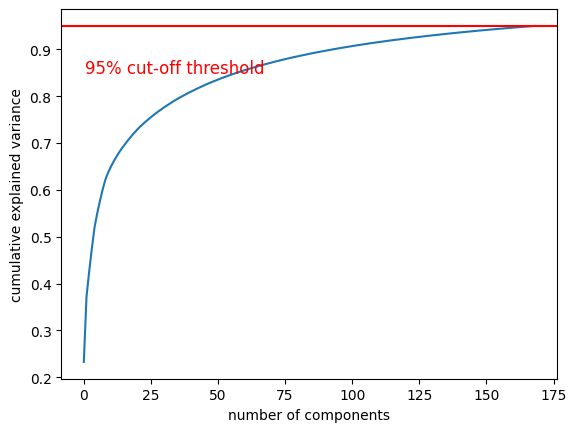

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)


Text(0, 0.5, 'individual explained variance')

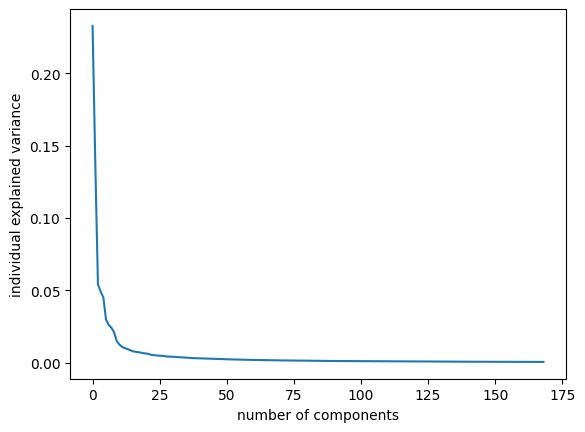

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('individual explained variance')

2. Какъв процент от дисперсията дават проекциите върху първите две главни оси?

In [12]:
pca2 = PCA(n_components = 2)
pC2 = pca2.fit_transform(X)
pCDF2 = pd.DataFrame(data = pC2, columns = ['PC1', 'PC2'])

In [13]:
DF2 = pd.concat([pCDF2, y], axis = 1)
DF2.head()

,PC1,PC2,y
0,12.892259,3.263486,6
1,-1.801894,4.314051,9
2,-9.042853,17.277310,9
3,21.599694,2.806869,4
4,-9.362828,-14.569525,1


Text(0, 0.5, '% of the cumulative explained variance')

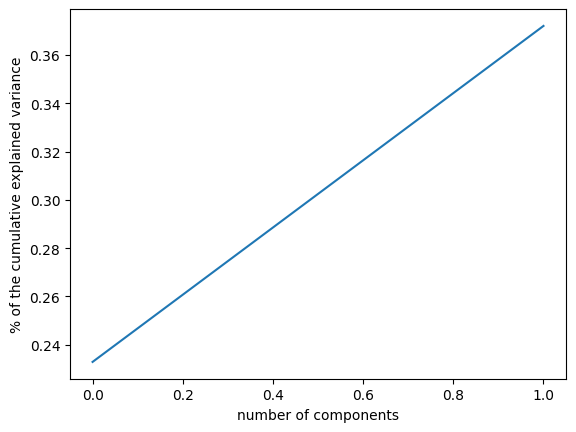

In [14]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('% of the cumulative explained variance')

3. Всеки елемент от dataset-a нанесете като точка върху двумерна равнина, осите на която са първата и втората главна оси, използвайки подходяща библиотека за графики, напр. matplotlib. Данните от различните класове да са изобразени с различни цветове.

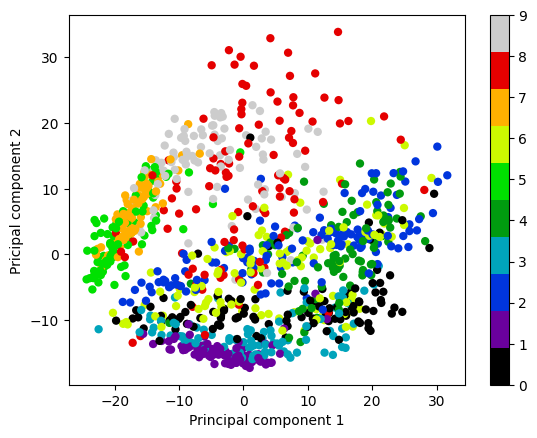

In [15]:
plt.scatter(pC2[:, 0], pC2[:, 1],c = y, edgecolor='none', alpha=1, cmap = plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('Principal component 1')
plt.ylabel('Pricipal component 2')
plt.colorbar()